# Home assignment 1

In [38]:
import numpy as np, polars as plt, matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize

# 1. Exploratory data analysis (_20 points_)

Use the "Housing prices" dataset: https://github.com/Michael-tehc/MachineLearning-MSU/raw/refs/heads/main/data/housing-ha1.csv.

## 1.1. Descriptive statistics

In [95]:
# Study the main descriptive statistics for numeric columns. What can be said about the dispersion of prices and areas?

## 1.2. Dealing with missing values


Check for missing values and duplicated rows. Make sure all missing values are represented as `null`.
1. How many missing values does each column have?
2. Make an assumption about the nature of the missing values. If you believe the data are missing according to the MAR principle, show this on a plot.

In [ ]:
# Your code here

## 1.3. Distribution analysis

1. Analyze the distribution of `price`: plot a histogram and a boxplot. Does this distribution seem Gaussian? If not, are there any transformations you can apply to make it closer to Gaussian? Process the data accordingly.
2. Analyze the distribution of the categorical feature `furnishingstatus`: what categories are there? In what proportions do they appear in the dataset? Do `furnishingstatus` and `price` correlate? Use the appropriate plot to demonstrate this.

In [ ]:
# Your code here

## 1.4. Handling outliers

Use the IQR with coefficient $1.5$ to determine outliers for `price`, `area` and `bedrooms`. Which observations can be considered outliers? Do you think these observations are anomalous, or could they represent a particular market like luxury houses? [Defend your answer.](https://www.reddit.com/r/technicallythetruth/comments/k61mby/defend_your_answer/) Propose an outlier analysis strategy: keep them as-is, remove or transform them. Motivate your choice. Transform the data accordingly.

In [ ]:
# Your code here

## 1.5. Creating a new feature

Create a new feature called `supposedly_luxury` that equals `True` if the house has any amenities from the set `{airconditioning, perfarea, parking}` and `False` otherwise.

In [ ]:
# Your code here

# 2. One-vs-one multiclass classification (_20 points_)

## 2.1. Fill in the blanks in the below code

In [96]:
class OneVsOneClassifier:
    """Basic one-vs-one multiclass classifier.

    Parameters:
        new_binary_classifier: function returning a new binary classifier with fit() & predict() methods
    """

    def __init__(self, new_base_classifier):
        self.new_base_classifier = new_base_classifier
    
    def fit(self, X, y):
        # fit() must fit all necessary classifiers based on self.new_base_classifier
        raise NotImplementedError()
        return self
    
    def predict(self, X):
        # predict() does prediction via voting
        raise NotImplementedError()
        return class_label

## 2.2. Make sure the below code runs

In [98]:
iris = datasets.load_iris()

In [ ]:
X = iris.data[:, :2] # use the first 2 features
y = iris.target

ovo_clf = OneVsOneClassifier(lambda: LogisticRegression(max_iter=200, random_state=42))
ovo_clf.fit(X, y)
y_pred = ovo_clf.predict(X)

# 3. Non-Gaussian regression (_20 points_)

In [71]:
def make_regression(n_samples: int, n_features: int, noise: str, bias: float=0, sigma: float=1, random_state=None):
    """Like `sklearn.datasets.make_regression`, but supports non-Gaussian noise.
    """
    X, _, coef = datasets.make_regression(n_samples, n_features, noise=sigma, bias=bias, coef=True, random_state=random_state)
    rng = np.random.RandomState(random_state)
    if noise.lower() == 'gauss':
        noise = rng.normal(size=n_samples)
    elif noise.lower() == 'laplace':
        noise = rng.laplace(size=n_samples)
    elif noise.lower() == 'cauchy':
        noise = rng.standard_cauchy(size=n_samples)
    else:
        raise ValueError(f"Unsupported noise distribution: {noise}")

    y = bias + X @ coef + sigma * noise

    return X, y, coef

## 3.1. Implement Laplace regression estimation (_5 points_)

In [69]:
class LaplaceRegression:
    def fit(self, X, y):
        "Fit the intercept and the coefficients"
        self.intercept_, self.coef_ = ..., ...
        return self

    def predict(self, X):
        return self.intercept_ + X.dot(self.coef_)

In [73]:
# This must run without errors
X, y, _ = make_regression(500, 5, 'laplace')
model = LaplaceRegression().fit(X, y)
assert hasattr(model, 'intercept_')
assert model.coef_.shape == (5, )

## 3.2. Estimate bias of OLS and Laplace models for Cauchy noise (_10 points_)

The bias of an estimator is defined as:
$$
b = \mathbb E(\hat\theta - \theta),
$$
where $\hat\theta$ is an estimator of the parameter $\theta$.

A natural way of estimating the bias is a simulation experiment, where we:
1. Generate many datasets.
2. For each dataset, compute the estimate and its error (difference from the true value).
3. Estimate the bias by the sample average of these errors: $$\hat b = \frac{1}{M}\sum_{m=1}^M (\hat\theta_m - \theta_m)$$

In [87]:
n_simulations, n_features = 1000, 2
# Compute errors (coef_fitted - coef_true)
errors_Gauss = np.zeros((n_simulations, n_features))
errors_Laplace = np.zeros((n_simulations, n_features))
for i in range(nsim):
    # Simulate dataset using Cauchy noise
    # Fit 2 regressions: OLS and Laplace

print(errors_Gauss.mean(0), errors_Laplace.mean(0))

[ 2.04940926 -0.65843135] [ 0.00366726 -0.01341424]


## 3.3. Plot boxplots of errors produced by OLS and Laplace (_5 points_)

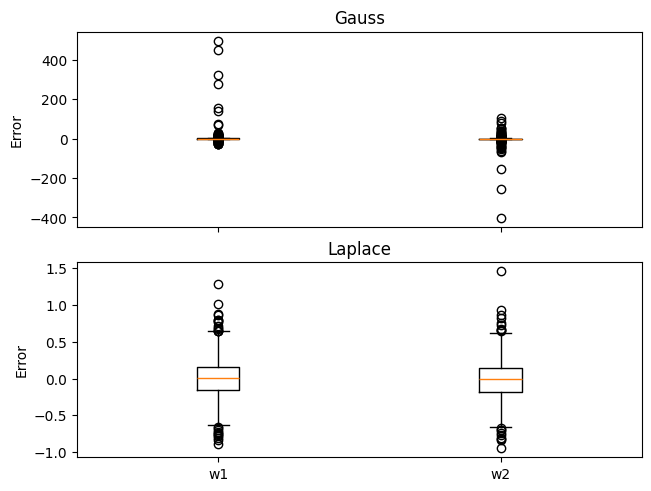

In [94]:
# Your plot doesn't need to exactly match this one,
# but it must show the differences in dispersion

Which method results in lower dispersion? Why? Write a short explanation.